In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np                                       #importing all the libs
import scipy as s
from scipy.io import loadmat
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, TensorBoard


import pylab as plt
import pandas as pd
import tensorflow as  tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout, LSTM
import tensorflow.keras.layers as kl
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras import regularizers

Using TensorFlow backend.


In [0]:
data1= loadmat("/content/drive/My Drive/data sets/Pavia.mat")          #import
image=data1["pavia"] 

data2=loadmat("/content/drive/My Drive/data sets/Pavia_gt.mat")                                #import
ground_truth=data2["pavia_gt"]               #storing array from dict to a var


In [0]:
image_with_gt = np.dstack((image, ground_truth))
final_output = image_with_gt.reshape(ground_truth.size, image.shape[2]+1)
data=pd.DataFrame(final_output)
data.shape

(783640, 103)

# **dropping 0**

In [0]:
data = data[data.iloc[:, -1] != 0]
data.shape

(148152, 103)

In [0]:
gt=data.loc[:,data.shape[1]-1]
dataset=data.loc[:, 0:data.shape[1]-2]

In [0]:
from sklearn import preprocessing
dataset = preprocessing.scale(dataset)
pd.DataFrame(dataset).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,-0.849971,-0.158633,-0.490222,-0.539308,-0.585380,-0.648186,-0.479602,-0.550079,-0.760515,-0.772068,-0.786486,-0.786810,-0.725571,-0.752196,-0.700437,-0.585675,-0.581345,-0.724789,-0.929410,-0.962856,-0.855359,-0.808503,-0.822292,-0.787596,-0.810133,-0.806421,-0.760905,-0.781973,-0.830884,-0.856767,-0.847830,-0.821465,-0.841797,-0.877187,-0.849356,-0.841859,-0.900795,-0.932575,-0.922034,-0.892556,...,-0.836107,-0.840840,-0.849973,-0.874625,-0.886890,-0.882155,-0.895772,-0.923467,-0.927778,-0.932316,-0.928115,-0.915885,-0.903169,-0.902115,-0.903040,-0.895879,-0.908177,-0.917647,-0.901298,-0.887057,-0.868769,-0.835759,-0.843943,-0.877347,-0.875569,-0.851284,-0.833233,-0.832739,-0.838902,-0.842573,-0.847881,-0.856655,-0.855570,-0.838849,-0.835241,-0.837247,-0.841004,-0.832970,-0.830792,-0.826673
1,-0.983104,-0.658969,-0.934079,-1.034491,-0.798958,-0.781963,-0.832125,-0.846718,-0.671060,-0.539827,-0.594143,-0.638988,-0.771224,-0.877596,-0.888545,-0.928988,-0.896170,-0.784665,-0.725149,-0.755866,-0.773868,-0.734745,-0.732649,-0.801326,-0.821435,-0.830934,-0.822940,-0.861347,-0.898758,-0.902035,-0.913267,-0.881566,-0.835695,-0.853393,-0.872471,-0.869865,-0.870086,-0.878528,-0.868281,-0.858593,...,-0.851618,-0.858426,-0.859854,-0.865822,-0.876003,-0.880004,-0.892597,-0.916172,-0.927778,-0.938327,-0.930088,-0.906161,-0.897480,-0.898448,-0.901271,-0.904415,-0.898210,-0.887583,-0.892544,-0.887057,-0.875848,-0.889623,-0.888111,-0.873364,-0.871655,-0.875470,-0.883191,-0.881867,-0.869230,-0.859762,-0.854176,-0.847992,-0.851634,-0.863381,-0.857614,-0.838055,-0.837743,-0.831328,-0.852393,-0.862168
2,-0.578682,-0.758498,-0.906510,-1.045198,-0.711468,-0.703716,-0.870167,-0.755644,-0.694739,-0.571141,-0.632612,-0.735837,-0.690063,-0.689496,-0.737564,-0.727905,-0.666106,-0.686468,-0.665771,-0.666484,-0.757570,-0.739355,-0.709664,-0.728099,-0.726497,-0.768536,-0.811862,-0.832684,-0.872484,-0.910657,-0.890047,-0.846334,-0.858069,-0.881152,-0.882102,-0.899739,-0.879118,-0.864581,-0.891798,-0.887704,...,-0.849402,-0.860624,-0.868637,-0.864722,-0.864027,-0.893987,-0.911649,-0.912004,-0.920615,-0.938327,-0.941926,-0.942140,-0.959112,-0.953445,-0.919845,-0.897586,-0.889903,-0.888396,-0.890157,-0.907436,-0.908883,-0.871669,-0.839036,-0.851060,-0.875569,-0.872349,-0.865238,-0.862372,-0.860676,-0.853511,-0.832143,-0.816490,-0.829591,-0.854676,-0.852820,-0.842098,-0.831219,-0.846106,-0.860702,-0.861343
3,-1.126284,-1.011356,-0.923052,-0.836418,-1.033122,-1.112620,-0.948787,-0.838911,-0.650011,-0.560703,-0.599272,-0.613501,-0.750933,-0.787308,-0.727663,-0.688669,-0.743601,-0.813406,-0.775027,-0.701766,-0.717989,-0.831553,-0.836083,-0.773866,-0.810133,-0.822020,-0.834017,-0.832684,-0.828694,-0.861079,-0.909045,-0.920942,-0.886546,-0.817702,-0.801201,-0.845593,-0.880925,-0.892476,-0.913635,-0.916816,...,-0.849402,-0.843038,-0.824722,-0.841615,-0.856406,-0.869247,-0.885187,-0.902625,-0.907312,-0.914283,-0.917263,-0.937278,-0.948682,-0.936946,-0.915423,-0.900147,-0.899871,-0.886771,-0.863897,-0.859623,-0.864836,-0.867588,-0.853758,-0.851856,-0.861480,-0.870789,-0.875385,-0.876408,-0.856788,-0.845698,-0.848668,-0.851930,-0.854783,-0.844388,-0.845629,-0.859885,-0.865467,-0.860885,-0.856548,-0.858041
4,0.230162,-0.129044,-0.142855,0.068295,-0.060442,-0.090360,-0.408590,-0.776461,-0.747360,-0.659862,-0.704420,-0.689961,-0.591149,-0.614256,-0.673211,-0.718096,-0.656419,-0.686468,-0.729899,-0.781740,-0.827419,-0.813113,-0.831486,-0.794461,-0.724237,-0.757394,-0.800785,-0.786383,-0.754252,-0.755454,-0.805612,-0.813175,-0.807218,-0.833565,-0.857061,-0.897872,-0.949569,-0.960471,-0.901876,-0.856975,...,-0.833891,-0.841939,-0.853267,-0.853719,-0.855317,-0.872474,-0.893655,-0.909920,-0.926754,-0.929310,-0.928115,-0.935334,-0.929718,-0.91

In [0]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 100) 
dataset_p = pca.fit_transform(dataset) 
 
print(dataset_p.shape) 
pd.DataFrame(dataset_p).head()

(148152, 100)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-8.356033,0.788524,0.109788,-0.544257,-0.265376,-0.226650,-0.129524,0.370371,-0.101408,0.069342,0.018716,0.097681,0.178541,-0.054141,0.002230,-0.349870,0.127429,-0.003165,-0.091799,0.011077,-0.058450,-0.148335,0.045202,-0.019676,-0.039275,0.103125,0.009676,0.012127,-0.013983,-0.002242,-0.007615,-0.036559,0.016281,0.023866,-0.006600,-0.017038,0.008707,-0.037726,-0.015479,0.020727,...,-0.001575,-0.000684,-0.017852,-0.005021,-0.009219,0.018915,0.006531,-0.004121,0.014725,-0.002483,0.011757,-0.013744,-0.002379,0.002963,-0.007757,0.009389,0.000119,0.011440,-0.000164,-0.003995,0.003315,-0.005319,-0.002528,0.001755,0.004853,0.002412,0.009625,-0.000758,0.004442,0.004597,0.006017,-0.004557,-0.002128,0.001057,0.002108,0.001290,0.001762,0.001959,0.000538,-0.000352
1,-8.615656,0.664735,-0.183489,0.133043,-0.068779,0.123249,-0.254512,0.079159,-0.035729,0.103613,-0.430111,0.045152,-0.158107,-0.106531,-0.069015,0.095496,0.005691,-0.056888,0.040076,0.001837,-0.067426,0.051007,0.030303,-0.016246,-0.012368,0.005798,-0.046704,0.013390,0.039434,-0.067540,0.030528,-0.024710,0.063010,-0.036172,0.029180,0.024439,0.032611,0.005504,-0.023679,-0.012505,...,-0.022136,0.018027,0.001226,0.015374,-0.013980,-0.006596,-0.003260,0.008381,0.001968,-0.006904,-0.015285,-0.002135,0.004822,0.000571,-0.000336,-0.000445,-0.001793,-0.005619,-0.004317,0.009330,0.000916,0.007099,0.011631,0.003362,-0.001562,0.000578,0.000034,-0.000689,-0.005510,0.003600,-0.001020,-0.004064,-0.002792,-0.001128,-0.001114,0.000531,-0.000967,0.003234,-0.002582,0.000055
2,-8.464781,0.807017,0.017333,-0.013341,0.045276,0.365898,-0.121856,-0.106618,-0.105274,0.061713,-0.157199,0.091707,-0.049491,0.075994,0.009778,0.101899,-0.034163,-0.038678,-0.087694,0.007301,-0.042610,0.106712,-0.026140,-0.047548,-0.022770,0.040977,0.073328,0.058414,0.002368,-0.053286,-0.004407,-0.023721,0.000401,0.062667,-0.008722,-0.029889,0.023781,0.004380,0.028171,0.000608,...,0.014063,-0.015306,0.009501,0.008425,0.008595,-0.003690,-0.008341,0.026600,0.004953,-0.004976,0.003778,-0.007129,0.005119,-0.004092,-0.007985,-0.010720,0.008377,-0.007734,-0.001112,-0.005320,0.004769,0.001465,0.005839,0.001177,0.000884,-0.000882,0.000951,-0.007525,0.001128,0.000201,0.003495,0.000487,0.001246,0.001051,-0.000611,-0.005388,-0.000508,-0.003543,0.001012,0.000466
3,-8.644425,0.657480,-0.185061,0.439656,-0.142276,0.009703,-0.424830,-0.299511,0.151335,0.055557,-0.149923,-0.014069,-0.036004,0.002492,-0.018005,-0.082608,0.047956,-0.020475,0.056071,-0.009571,0.016620,0.029900,0.102042,0.082284,0.000892,-0.038205,-0.024745,0.053565,-0.101376,-0.003859,-0.061862,-0.120318,-0.030319,0.020605,0.030203,0.010666,0.015725,-0.004132,-0.044047,0.015703,...,-0.001231,0.013920,-0.009790,-0.015449,0.004284,-0.005167,0.033505,0.007456,0.018730,-0.003287,-0.001477,-0.002404,-0.007176,-0.010919,-0.000339,0.002000,0.001284,0.002285,-0.002374,0.000196,0.003958,0.006803,0.002734,-0.000375,0.002467,-0.003657,-0.000221,-0.002237,0.005399,-0.002795,0.000969,-0.001983,-0.000673,0.000409,-0.000078,-0.000855,0.001667,0.003129,-0.001056,-0.001258
4,-7.931189,1.097605,0.408962,-1.519443,-0.309550,-0.034129,0.699160,0.009523,-0.083106,0.035797,0.026078,-0.125700,-0.049281,0.028689,0.181927,-0.083843,-0.086143,0.042872,-0.022148,0.163822,-0.048185,-0.108904,-0.029240,0.072283,-0.002959,0.007149,0.003730,-0.011003,0.008877,-0.011966,-0.101729,-0.003101,0.062850,-0.039786,0.063508,-0.019575,-0.028473,0.037788,-0.011450,0.028669,...,-0.000429,0.005743,0.007600,0.006048,-0.009681,0.027748,-0.021773,0.014551,0.003779,-0.005739,0.006257,-0.000949,0.002994,-0.014320,0.000823,-0.004642,-0.004992,-0.001879,-0.010969,0.000590,0.000520,-0.001175,-0.008216,-0.003054,0.004280,0.001015,0.002289,0.000003,0.000162,0.001999,-0.005659,0.002544,-0.003214,-

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(dataset_p,gt, test_size=0.30, random_state=42)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(103706, 1, 100) (103706,) (44446, 1, 100) (44446,)


In [0]:
# design network
model = Sequential()
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2]), dropout=0.1))
model.add(Dense(100,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# fit network
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), 
                    epochs=100,verbose=1,
                    validation_split=0.5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
Total params: 260,900
Trainable params: 260,900
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1621/1621 [==============================] - 13s 8ms/step - loss: 0.3429 - accuracy: 0.9358 - val_loss: 0.0678 - val_accuracy: 0.9777
Epoch 2/100
1621/1621 [==============================] - 13s 8ms/step - loss: 0.1007 - accuracy: 0.9680 - val_loss: 0.0546 - val_accuracy: 0.9813
Epoch 3/100
1621/1621 [==============================] - 12s 7ms/step - loss: 0.0859 - accuracy: 0.9715 - val_loss: 0.0501 - val_accuracy: 0.9827
Epoch 4/100
1621/1621 [==============================] - 12s 7ms/step - lo

99.46811382904045


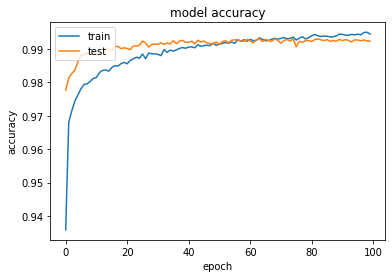

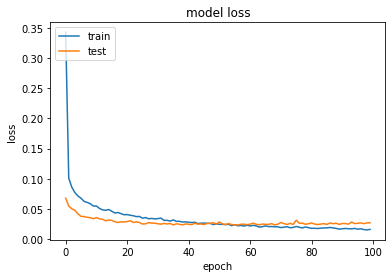

In [0]:
pred = dataset_p.reshape((dataset_p.shape[0], 1, dataset_p.shape[1]))



Y_pred_test = model.predict(pred)
y_pred_test = np.argmax(Y_pred_test, axis=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(gt, y_pred_test)*100)

#= summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()